<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/PHSarima_arima_of_pressure_14dayspj_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [101]:
df=pd.read_csv('PH.csv')
df.head()

,created_at,PH
0,2022-03-27T15:07:07+00:00,7.11
1,2022-03-27T15:07:34+00:00,7.13
2,2022-03-27T15:07:53+00:00,7.13
3,2022-03-27T15:08:24+00:00,7.15
4,2022-03-27T15:08:40+00:00,7.14


In [102]:
df.tail()

,created_at,PH
60164,2022-04-12T18:10:02+00:00,7.49
60165,2022-04-12T18:10:18+00:00,7.50
60166,2022-04-12T18:10:34+00:00,7.50
60167,2022-04-12T18:10:50+00:00,7.52
60168,2022-04-12T18:11:06+00:00,7.50


In [65]:
df.colunms=["created_at	","PH"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,created_at,PH
0,2022-03-27T15:07:07+00:00,7.11
1,2022-03-27T15:07:34+00:00,7.13
2,2022-03-27T15:07:53+00:00,7.13
3,2022-03-27T15:08:24+00:00,7.15
4,2022-03-27T15:08:40+00:00,7.14


In [103]:
df.tail()

,created_at,PH
60164,2022-04-12T18:10:02+00:00,7.49
60165,2022-04-12T18:10:18+00:00,7.50
60166,2022-04-12T18:10:34+00:00,7.50
60167,2022-04-12T18:10:50+00:00,7.52
60168,2022-04-12T18:11:06+00:00,7.50


In [104]:
df['created_at']=pd.to_datetime(df["created_at"])

In [105]:
df.head()

,created_at,PH
0,2022-03-27 15:07:07+00:00,7.11
1,2022-03-27 15:07:34+00:00,7.13
2,2022-03-27 15:07:53+00:00,7.13
3,2022-03-27 15:08:24+00:00,7.15
4,2022-03-27 15:08:40+00:00,7.14


In [106]:
df.set_index("created_at",inplace=True)

In [107]:
df.head()

,PH
created_at,
2022-03-27 15:07:07+00:00,7.11
2022-03-27 15:07:34+00:00,7.13
2022-03-27 15:07:53+00:00,7.13
2022-03-27 15:08:24+00:00,7.15
2022-03-27 15:08:40+00:00,7.14


In [108]:
df.shape

(60169, 1)

In [74]:
df.describe()

,PH
count,60169.000000
mean,6.974127
std,1.634548
min,0.020000
25%,7.330000
50%,7.470000
75%,7.540000
max,10.910000


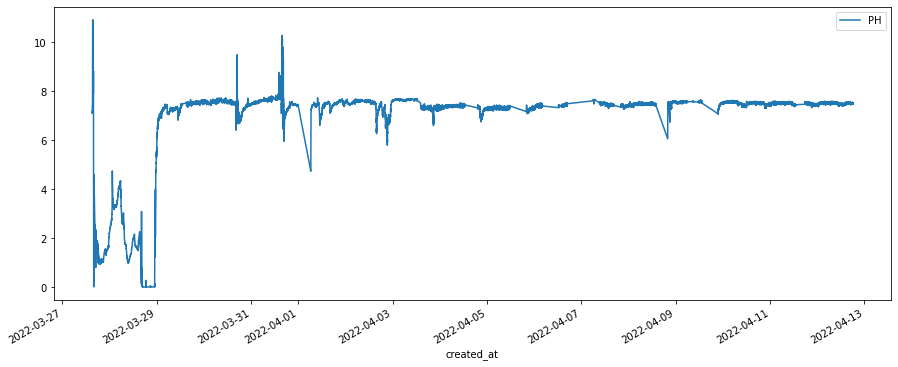

In [109]:
df.plot(figsize=(15,6))
plt.show()

In [112]:
from statsmodels.tsa.stattools import adfuller

In [113]:
test_result=adfuller(df['PH'])

In [137]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(	PH):
    result=adfuller(	PH)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [115]:
adfuller_test(df['PH'])

ADF Test Statistic : -2.6833461894358073
p-value : 0.07696470683003094
#Lags Used : 60
Number of Observations Used : 60108
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [116]:
df['PHFirst Difference'] = df['PH'] - df['PH'].shift(1)

In [138]:
df['PH'].shift(1)

created_at
2022-03-27 15:07:07+00:00     NaN
2022-03-27 15:07:34+00:00    7.11
2022-03-27 15:07:53+00:00    7.13
2022-03-27 15:08:24+00:00    7.13
2022-03-27 15:08:40+00:00    7.15
                             ... 
2022-04-12 18:10:02+00:00    7.51
2022-04-12 18:10:18+00:00    7.49
2022-04-12 18:10:34+00:00    7.50
2022-04-12 18:10:50+00:00    7.50
2022-04-12 18:11:06+00:00    7.52
Name: PH, Length: 60169, dtype: float64

In [118]:
df['Seasonal First Difference']=df['PH']-df['PH'].shift(12)

In [139]:
df.head(14)

,PH,PHFirst Difference,Seasonal First Difference,forecast
created_at,,,,
2022-03-27 15:07:07+00:00,7.11,NaN,NaN,NaN
2022-03-27 15:07:34+00:00,7.13,0.02,NaN,NaN
2022-03-27 15:07:53+00:00,7.13,0.00,NaN,NaN
2022-03-27 15:08:24+00:00,7.15,0.02,NaN,NaN
2022-03-27 15:08:40+00:00,7.14,-0.01,NaN,NaN
2022-03-27 15:21:48+00:00,7.55,0.41,NaN,NaN
2022-03-27 15:22:26+00:00,8.14,0.59,NaN,NaN
2022-03-27 15:22:41+00:00,8.23,0.09,NaN,NaN
2022-03-27 15:23:09+00:00,8.62,0.39,NaN,NaN


In [140]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -44.403944730973535
p-value : 0.0
#Lags Used : 60
Number of Observations Used : 60096
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


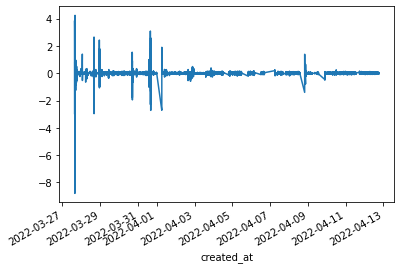

In [141]:
df['Seasonal First Difference'].plot()

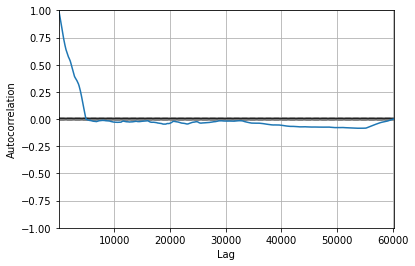

In [142]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['PH'])
plt.show()

In [143]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

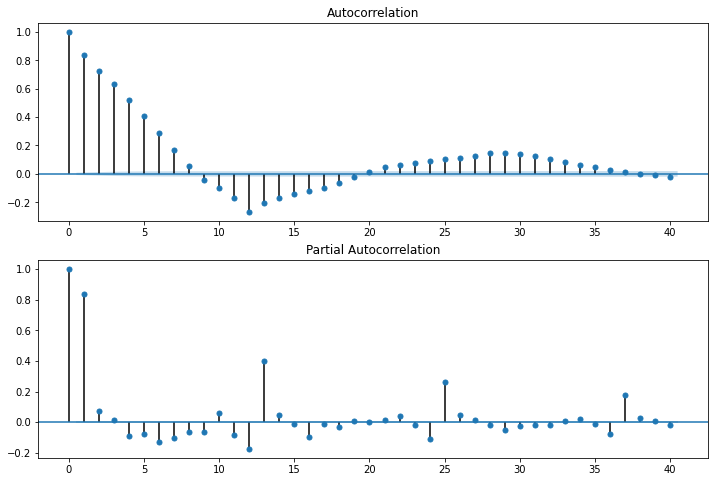

In [144]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [146]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [147]:
model=ARIMA(df['PH'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [148]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.PH   No. Observations:                60168
Model:                 ARIMA(1, 1, 1)   Log Likelihood               80746.990
Method:                       css-mle   S.D. of innovations              0.063
Date:                Wed, 11 May 2022   AIC                        -161485.979
Time:                        21:07:10   BIC                        -161449.960
Sample:                             1   HQIC                       -161474.792
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.297e-06      0.000      0.032      0.975      -0.000       0.000
ar.L1.D.PH     0.2915      0.025     11.498      0.000       0.242       0.341
ma.L1.D.PH    -0.4536      0.024    -19.090      0.000      -0.500      -0.407
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.4300           +0.0000j            3.4300            0.0000
MA.1            2.2045           +0.0000j            2.2045            0.0000
-----------------------------------------------------------------------------
"""

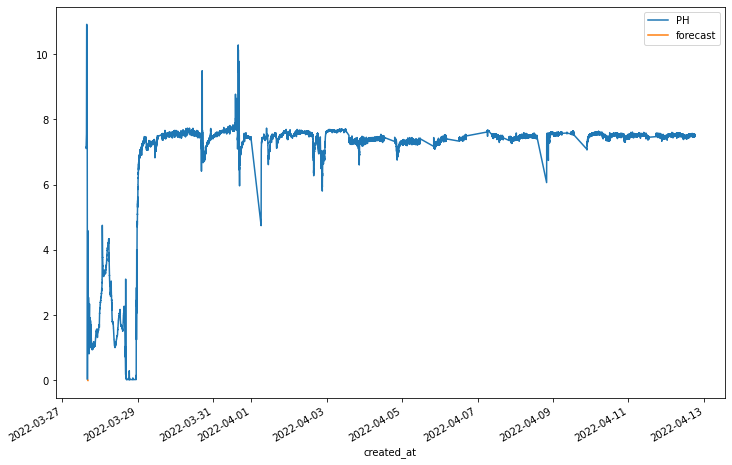

In [149]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['PH','forecast']].plot(figsize=(12,8))

In [150]:
import statsmodels.api as sm

In [151]:
model=sm.tsa.statespace.SARIMAX(df['PH'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


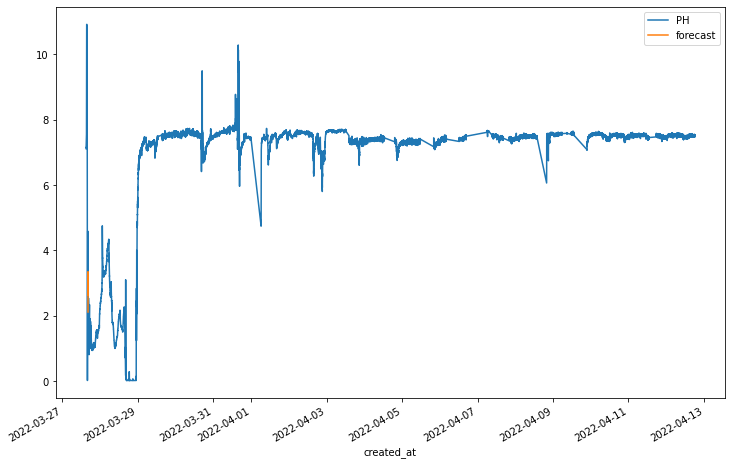

In [152]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['PH','forecast']].plot(figsize=(12,8))

In [153]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [154]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [155]:
future_datest_df.tail()

,PH,PHFirst Difference,Seasonal First Difference,forecast
2023-11-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2023-12-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2024-01-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2024-02-12 18:11:06+00:00,NaN,NaN,NaN,NaN
2024-03-12 18:11:06+00:00,NaN,NaN,NaN,NaN


In [156]:
future_df=pd.concat([df,future_datest_df])

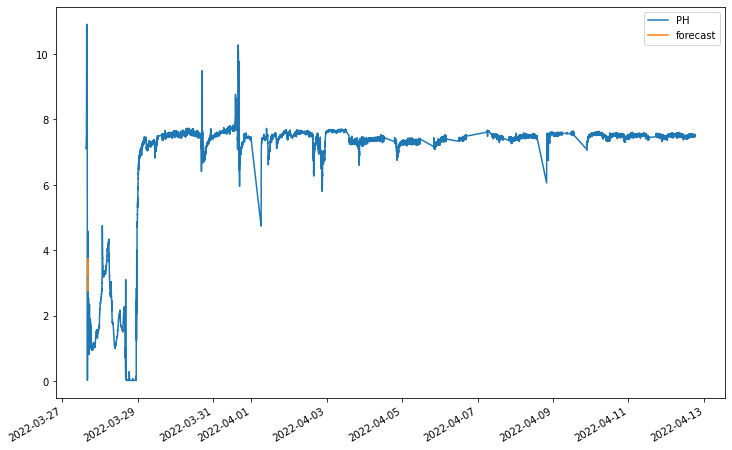

In [157]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['PH', 'forecast']].plot(figsize=(12, 8)) 